In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weather.csv')
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [4]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [5]:
df.shape

(366, 22)

# Updating null values

In [6]:
updated_weather_df = df
updated_weather_df['Sunshine']=updated_weather_df['Sunshine'].fillna(updated_weather_df['Sunshine'].mean())
updated_weather_df['WindGustSpeed']=updated_weather_df['WindGustSpeed'].fillna(updated_weather_df['WindGustSpeed'].mean())
updated_weather_df['WindSpeed9am']=updated_weather_df['WindSpeed9am'].fillna(updated_weather_df['WindSpeed9am'].mean())

In [7]:
updated_weather_df.loc[updated_weather_df.RainToday == "Yes", "RainToday"] = 1
updated_weather_df.loc[updated_weather_df.RainToday == "No", "RainToday"] = 0
updated_weather_df['RainToday'] = updated_weather_df['RainToday'].astype(int)

updated_weather_df.loc[updated_weather_df.RainTomorrow == "Yes", "RainTomorrow"] = 1
updated_weather_df.loc[updated_weather_df.RainTomorrow == "No", "RainTomorrow"] = 0
updated_weather_df['RainTomorrow'] = updated_weather_df['RainTomorrow'].astype(int)

updated_weather_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


In [8]:
num_weather_df = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                     'Temp9am', 'Temp3pm', 'RainToday','RainTomorrow']]
num_weather_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,0,1
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,1,1
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,1
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,1,1
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0


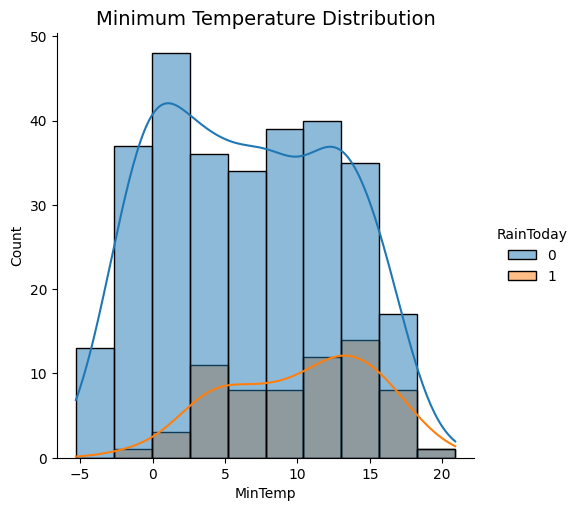

In [9]:
import seaborn as sns

sns.displot(num_weather_df, x="MinTemp", hue='RainToday', kde=True)
plt.title("Minimum Temperature Distribution", fontsize = 14)
plt.show()

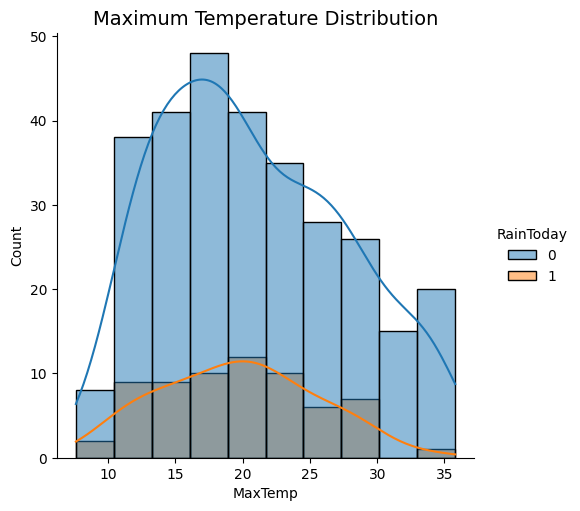

In [10]:
sns.displot(num_weather_df, x="MaxTemp", hue='RainToday', kde=True)
plt.title("Maximum Temperature Distribution", fontsize = 14)
plt.show()

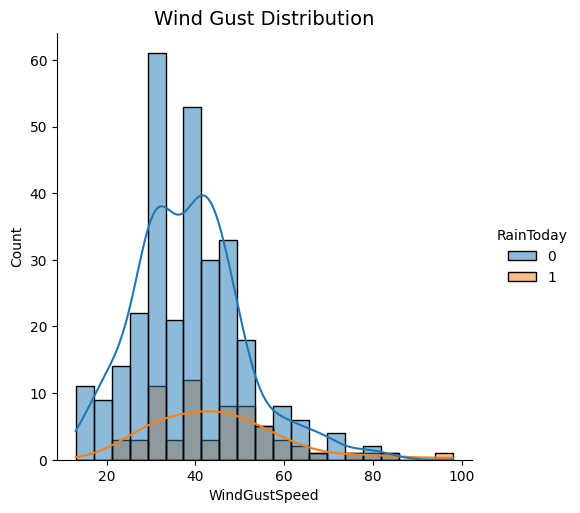

In [11]:
sns.displot(num_weather_df, x="WindGustSpeed", hue='RainToday', kde=True)
plt.title("Wind Gust Distribution", fontsize = 14)
plt.show()

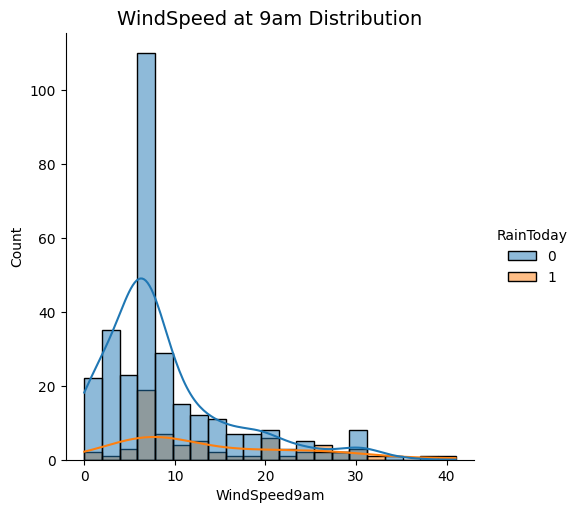

In [12]:
sns.displot(num_weather_df, x="WindSpeed9am", hue='RainToday', kde=True)
plt.title("WindSpeed at 9am Distribution", fontsize = 14)
plt.show()

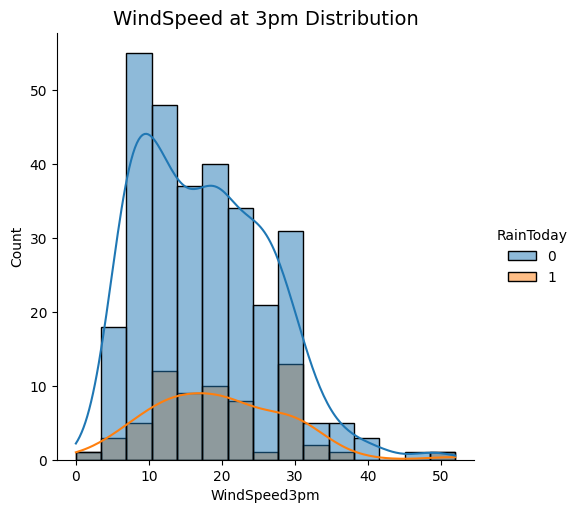

In [13]:
sns.displot(num_weather_df, x="WindSpeed3pm", hue='RainToday', kde=True)
plt.title("WindSpeed at 3pm Distribution", fontsize = 14)
plt.show()

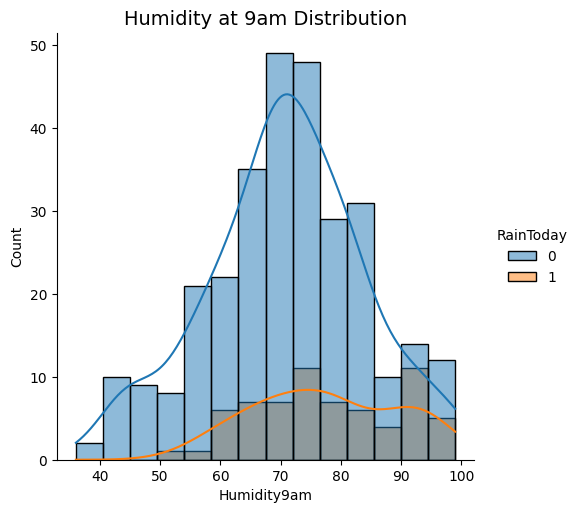

In [14]:
sns.displot(num_weather_df, x="Humidity9am", hue='RainToday', kde=True)
plt.title("Humidity at 9am Distribution", fontsize = 14)
plt.show()

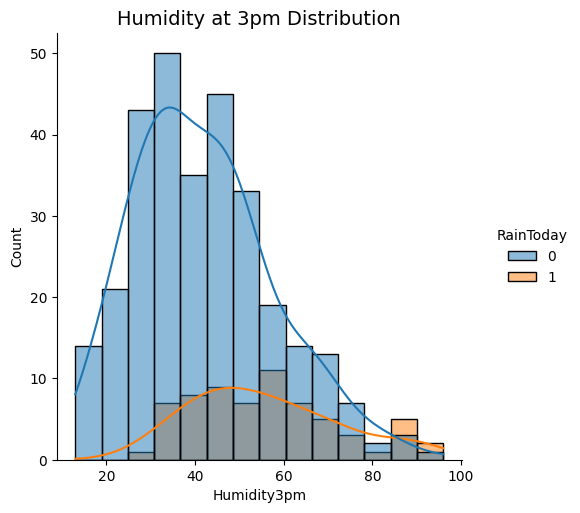

In [15]:
sns.displot(num_weather_df, x="Humidity3pm", hue='RainToday', kde=True)
plt.title("Humidity at 3pm Distribution", fontsize = 14)
plt.show()

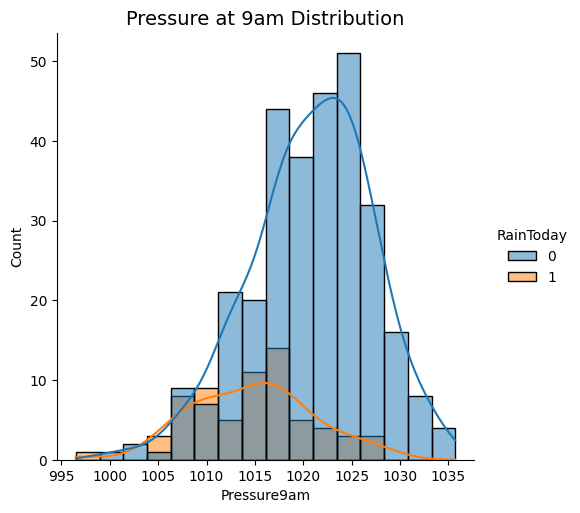

In [16]:
sns.displot(num_weather_df, x="Pressure9am", hue='RainToday', kde=True)
plt.title("Pressure at 9am Distribution", fontsize = 14)
plt.show()

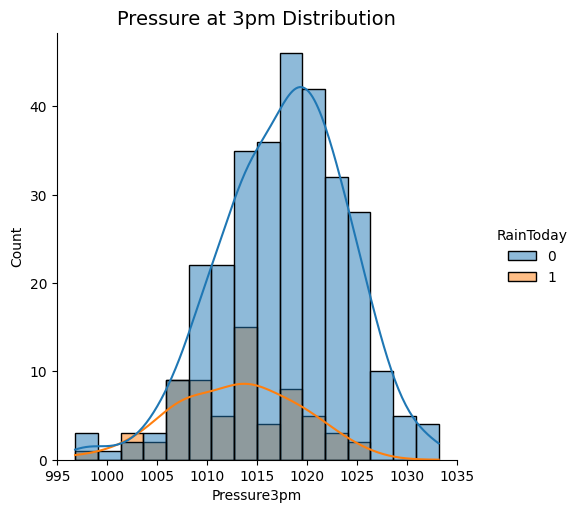

In [17]:
sns.displot(num_weather_df, x="Pressure3pm", hue='RainToday', kde=True)
plt.title("Pressure at 3pm Distribution", fontsize = 14)
plt.show()

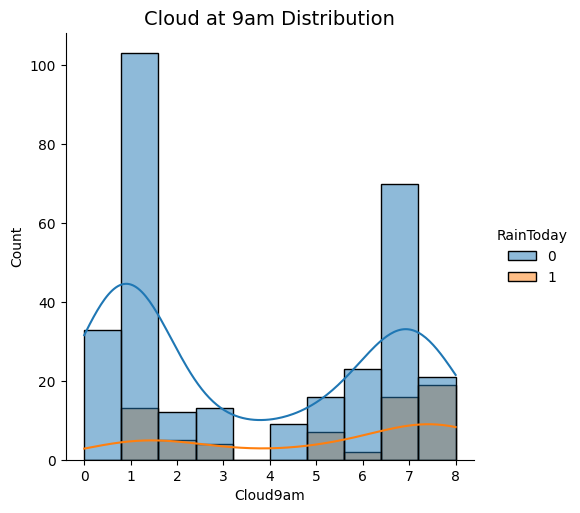

In [18]:
sns.displot(num_weather_df, x="Cloud9am", hue='RainToday', kde=True)
plt.title("Cloud at 9am Distribution", fontsize = 14)
plt.show()

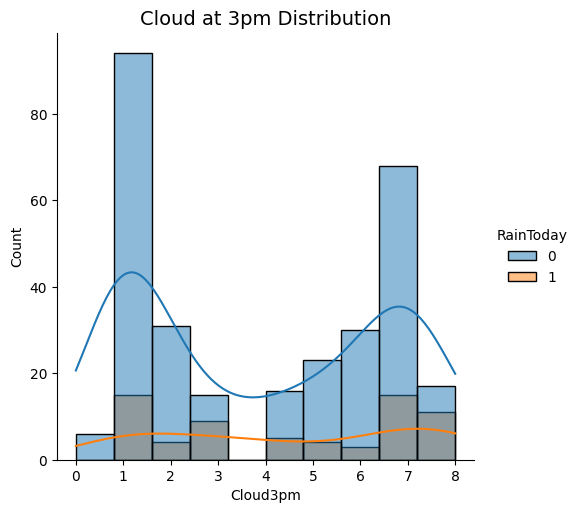

In [19]:
sns.displot(num_weather_df, x="Cloud3pm", hue='RainToday', kde=True)
plt.title("Cloud at 3pm Distribution", fontsize = 14)
plt.show()

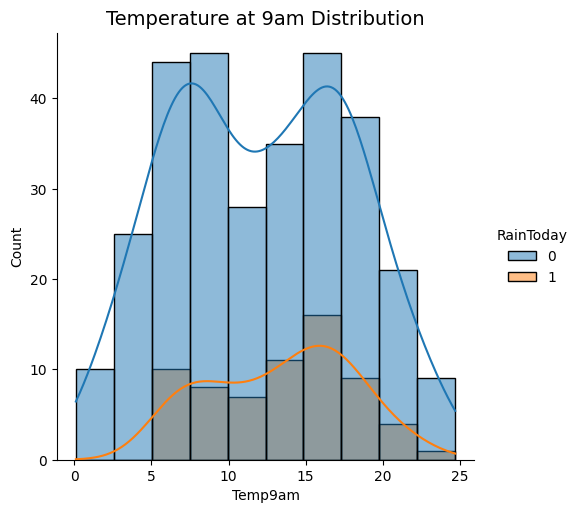

In [20]:
sns.displot(num_weather_df, x="Temp9am", hue='RainToday', kde=True)
plt.title("Temperature at 9am Distribution", fontsize = 14)
plt.show()

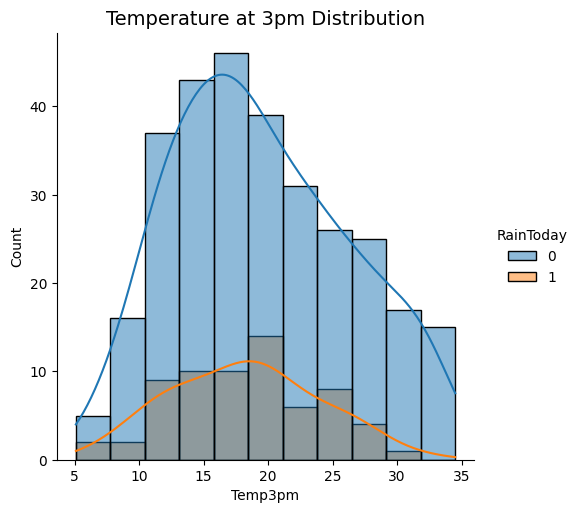

In [21]:
sns.displot(num_weather_df, x="Temp3pm", hue='RainToday', kde=True)
plt.title("Temperature at 3pm Distribution", fontsize = 14)
plt.show()

In [22]:
weather_corr = num_weather_df.corr()
weather_corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.752471,0.201939,0.649930,0.035531,0.217224,0.126251,-0.065922,-0.207897,-0.040709,-0.501707,-0.498007,0.215776,0.118397,0.916745,0.722730,0.230733,0.233213
MaxTemp,0.752471,1.000000,-0.073560,0.690026,0.451395,0.109415,-0.214649,-0.167873,-0.359602,-0.533327,-0.290883,-0.379394,-0.175730,-0.135991,0.870604,0.989261,-0.065860,0.049228
Rainfall,0.201939,-0.073560,1.000000,-0.007293,-0.149326,0.096160,0.218979,0.056008,0.150109,0.289013,-0.331581,-0.250218,0.180046,0.127792,0.077299,-0.087493,0.693024,0.133586
Evaporation,0.649930,0.690026,-0.007293,1.000000,0.316942,0.287709,0.068176,0.048601,-0.519587,-0.391780,-0.381906,-0.391093,-0.106007,-0.100045,0.707676,0.671632,-0.032638,0.090528
Sunshine,0.035531,0.451395,-0.149326,0.316942,1.000000,0.095676,-0.064200,0.072494,-0.497692,-0.755186,0.006238,-0.035964,-0.678125,-0.658699,0.219276,0.469774,-0.166477,-0.386095
WindGustSpeed,0.217224,0.109415,0.096160,0.287709,0.095676,1.000000,0.518508,0.693641,-0.349433,-0.069432,-0.537126,-0.524435,-0.012648,0.050051,0.255331,0.072348,0.189886,0.249445
WindSpeed9am,0.126251,-0.214649,0.218979,0.068176,-0.064200,0.518508,1.000000,0.467090,-0.267654,0.145866,-0.350416,-0.243102,0.100961,-0.022312,0.063303,-0.232944,0.262626,0.088224
WindSpeed3pm,-0.065922,-0.167873,0.056008,0.048601,0.072494,0.693641,0.467090,1.000000,-0.266092,-0.026368,-0.359800,-0.337325,-0.026426,0.007207,-0.017766,-0.187570,0.083483,0.042505
Humidity9am,-0.207897,-0.359602,0.150109,-0.519587,-0.497692,-0.349433,-0.267654,-0.266092,1.000000,0.546718,0.135727,0.134420,0.392842,0.271938,-0.436551,-0.355119,0.203495,0.185077
Humidity3pm,-0.040709,-0.533327,0.289013,-0.391780,-0.755186,-0.069432,0.145866,-0.026368,0.546718,1.000000,-0.087946,-0.010052,0.551633,0.510108,-0.255681,-0.581676,0.319582,0.366882


In [23]:
cor_target = abs(weather_corr["RainTomorrow"])

relevant_train_features = cor_target[cor_target>0.20]
relevant_train_features

MinTemp          0.233213
Sunshine         0.386095
WindGustSpeed    0.249445
Humidity3pm      0.366882
Pressure9am      0.330047
Pressure3pm      0.370247
Cloud9am         0.284579
Cloud3pm         0.388020
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

In [24]:
final_weather_train_data = num_weather_df[['MinTemp','Sunshine','WindGustSpeed','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','RainTomorrow']]
final_weather_train_data.head()

,MinTemp,Sunshine,WindGustSpeed,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainTomorrow
0,8.0,6.3,30.0,29,1019.7,1015.0,7,7,1
1,14.0,9.7,39.0,36,1012.4,1008.4,5,3,1
2,13.7,3.3,85.0,69,1009.5,1007.2,8,7,1
3,13.3,9.1,54.0,56,1005.5,1007.0,2,7,1
4,7.6,10.6,50.0,49,1018.3,1018.5,7,7,0


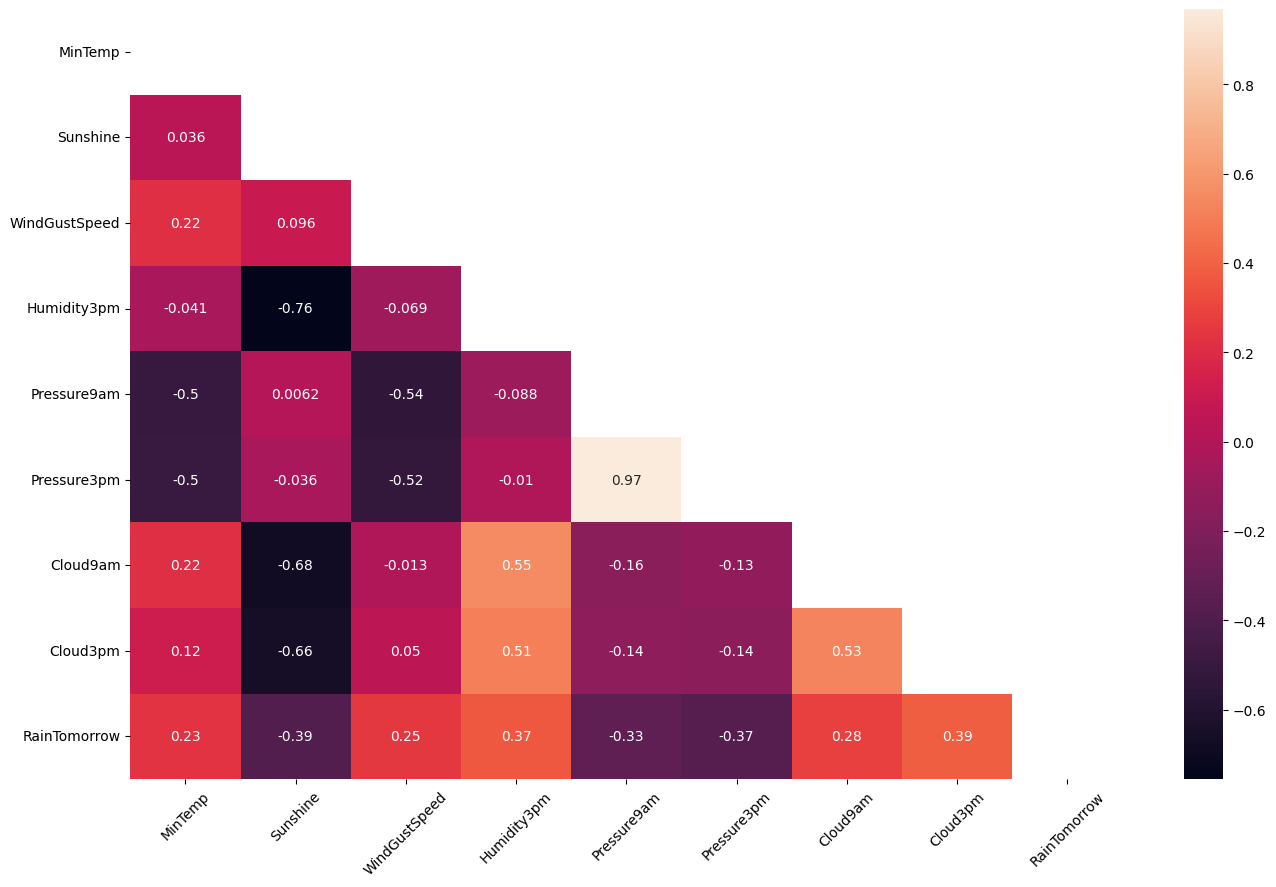

In [25]:
final_train_corr = final_weather_train_data.corr()
mask = np.triu(np.ones_like(final_train_corr, dtype=bool))
plt.figure(figsize=(16,10))
sns.heatmap(final_train_corr,annot=True, mask = mask)
plt.xticks(rotation=45)
plt.show()

In [27]:
X = final_weather_train_data.drop(['RainTomorrow'], axis=1)
y = final_weather_train_data['RainTomorrow']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(292, 8) (74, 8) (292,) (74,)


# Randomforest classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

rforest_model = RandomForestClassifier()
rforest_model.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
rforest_model.predict(X_val)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0])

In [34]:
rforest_model_score = rforest_model.score(X_val, y_val)
rforest_model_accuracy = round(rforest_model_score*100, 2)
print("The classification accuracy of Random Forest model is "+ str(rforest_model_accuracy)+"%")

The classification accuracy of Random Forest model is 86.49%


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

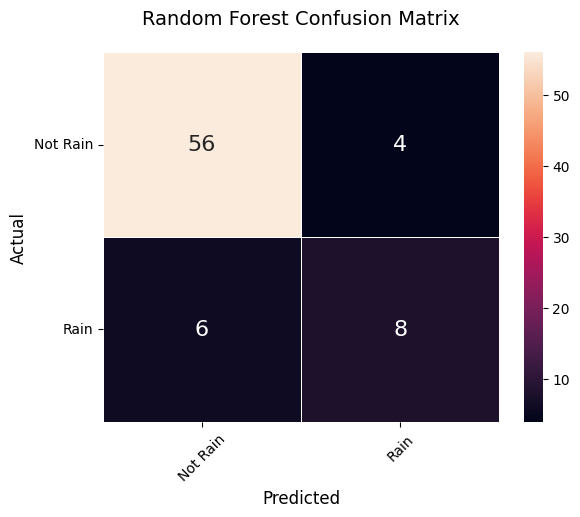

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rforest_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Random Forest Confusion Matrix', fontsize=14, pad=20)

In [37]:
print('Random Forest Classification Report')
print('===================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Random Forest Classification Report

              precision    recall  f1-score   support

    Not Rain       0.90      0.93      0.92        60
        Rain       0.67      0.57      0.62        14

    accuracy                           0.86        74
   macro avg       0.78      0.75      0.77        74
weighted avg       0.86      0.86      0.86        74



# Random forest acheived an accuracy of 86%